`K-Nearest Neighbors (KNN)
`
KNN is a supervised machine learning algorithm used for classification and regression tasks. It's a simple, yet effective algorithm that works by finding the most similar data points (nearest neighbors) to a new, unseen data point.

How KNN Works:

1. Data Preparation: Prepare the dataset with labeled examples.
2. Distance Calculation: Calculate the distance between the new data point and all other data points in the dataset.
3. K-Nearest Neighbors Selection: Select the k most similar data points (nearest neighbors) based on the distance calculation.
4. Prediction: Use the labels of the k-nearest neighbors to make a prediction for the new data point.

Types of Distance Metrics:

1. Euclidean Distance: Measures the straight-line distance between two points.
2. Manhattan Distance: Measures the sum of the absolute differences between two points.
3. Minkowski Distance: A generalization of Euclidean and Manhattan distances.

Advantages:

1. Simple to Implement: KNN is a simple algorithm to understand and implement.
2. Non-Parametric: KNN doesn't make any assumptions about the underlying data distribution.
3. Handling Non-Linear Relationships: KNN can handle non-linear relationships between features.

Disadvantages:

1. Computationally Expensive: KNN can be slow for large datasets.
2. Sensitive to Noise: KNN can be sensitive to noisy or irrelevant features.

Applications:

1. Recommendation Systems: KNN is used in recommendation systems to suggest products based on user behavior.
2. Image Classification: KNN is used in image classification tasks, such as object recognition.
3. Customer Segmentation: KNN is used in customer segmentation to group similar customers based on their behavior.

KNN is a popular algorithm for classification and regression tasks, and its simplicity and effectiveness make it a great choice for many applications.

`For Classification`

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
#load the dataser
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
X = data.drop(columns='species', axis=1)
y = data['species']

train_X, test_X, train_Y, test_Y = train_test_split(X, y, train_size=0.2, random_state=42)

In [53]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_Y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [54]:
y_pred = model.predict(test_X)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica

In [55]:
print(f'this is the confusion matrix {confusion_matrix(test_Y, y_pred)}')
print(f'this is the confusion matrix {classification_report(test_Y, y_pred)}')

this is the confusion matrix [[43  0  0]
 [ 0 38  1]
 [ 0  3 35]]
this is the confusion matrix               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        43
  versicolor       0.93      0.97      0.95        39
   virginica       0.97      0.92      0.95        38

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



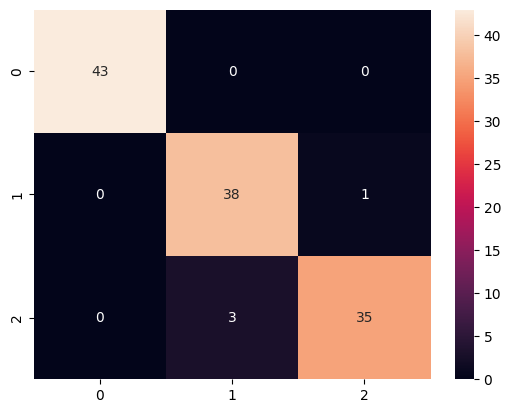

In [56]:
sns.heatmap(data = confusion_matrix(test_Y, y_pred), annot=True)
plt.show()

`For Regression`

In [57]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [58]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [59]:
X = data.drop('tip', axis=1)
y = data['tip']

encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'category':  # Check if column type is object (string)
        X[col] = encoder.fit_transform(X[col])  # Fit and transform the column

train_X, test_X, train_Y, test_Y = train_test_split(X, y, train_size=0.2, random_state=42)

In [60]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(train_X, train_Y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [61]:
y_pred = model.predict(test_X)
y_pred

array([3.078, 1.984, 3.254, 3.176, 1.856, 3.716, 3.524, 1.856, 2.28 ,
       3.058, 3.216, 1.884, 1.984, 1.864, 1.984, 3.238, 3.238, 3.334,
       3.27 , 4.45 , 3.39 , 3.334, 1.864, 1.784, 3.476, 1.968, 1.784,
       2.708, 3.466, 4.45 , 3.05 , 1.684, 3.482, 3.472, 3.53 , 4.024,
       1.472, 4.45 , 2.24 , 3.284, 1.884, 2.24 , 3.96 , 1.784, 1.984,
       1.684, 1.504, 3.482, 1.684, 1.62 , 3.33 , 3.268, 3.264, 3.04 ,
       3.062, 1.836, 1.684, 3.53 , 3.53 , 3.058, 3.524, 3.53 , 3.366,
       3.27 , 3.054, 3.334, 2.464, 1.684, 3.726, 3.988, 3.002, 3.524,
       3.   , 3.478, 3.058, 3.39 , 3.564, 4.046, 3.05 , 3.524, 1.984,
       3.946, 3.63 , 1.968, 3.05 , 3.118, 3.482, 2.744, 3.676, 3.434,
       2.28 , 3.524, 1.984, 3.27 , 3.416, 1.784, 4.45 , 3.   , 3.404,
       3.53 , 3.63 , 3.53 , 3.074, 3.678, 3.318, 1.62 , 1.884, 1.76 ,
       3.086, 2.64 , 3.53 , 3.074, 4.342, 3.208, 1.472, 2.18 , 1.968,
       3.564, 2.81 , 3.564, 4.45 , 1.656, 3.334, 3.27 , 4.342, 1.76 ,
       3.058, 1.856,

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
print(f'this is the r2 square {r2_score(test_Y, y_pred)}')
print(f'this is the mean squared  {mean_squared_error(test_Y, y_pred)}')
print(f'this is the root mean squared  {np.sqrt(mean_squared_error(test_Y, y_pred))}')

this is the r2 square 0.33616930719838334
this is the mean squared  1.195070306122449
this is the root mean squared  1.0931927122527159
